In [1]:
from nilearn.datasets import fetch_coords_power_2011
from utils.basics import ATLASES_DIR
import os
import os.path as osp
import pandas as pd

In [2]:
power_atlas_info = fetch_coords_power_2011(False)

In [3]:
power_atlas_info['rois'].head(5)

,roi,x,y,z
0,1,-25,-98,-12
1,2,27,-97,-13
2,3,24,32,-18
3,4,-56,-45,-24
4,5,8,41,-24


In [4]:
ATLAS_NAME='Power264'
ATLAS_DIR = osp.join(ATLASES_DIR,ATLAS_NAME)

In [5]:
if not osp.exists(ATLAS_DIR):
    os.makedirs(ATLAS_DIR)

In [6]:
roi_centers_path = osp.join(ATLAS_DIR,f'{ATLAS_NAME}.roi_coords.MNI.csv')
power_atlas_info['rois'][['x','y','z','roi']].to_csv(roi_centers_path, header=None, index=None)

In [7]:
roi_info_df = power_atlas_info['rois'].copy()
roi_info_df.columns = ['ROI_ID','pos_A','pos_R','pos_S']
roi_info_df['ROI_Name'] = ['ROI'+str(r).zfill(3) for r in roi_info_df['ROI_ID']]
roi_info_df = roi_info_df[['ROI_ID','ROI_Name','pos_A','pos_R','pos_S']]
print(roi_info_df.shape)
roi_info_df.head(5)

(264, 5)


,ROI_ID,ROI_Name,pos_A,pos_R,pos_S
0,1,ROI001,-25,-98,-12
1,2,ROI002,27,-97,-13
2,3,ROI003,24,32,-18
3,4,ROI004,-56,-45,-24
4,5,ROI005,8,41,-24


In [8]:
color_map_dict={'White':'#ffffff','Cyan':'#E0FFFF','Orange':'#FFA500','Purple':'#800080',
                'Pink':'#FFC0CB','Red':'#ff0000','Gray':'#808080','Teal':'#008080','Brown':'#A52A2A',
                'Blue':'#0000ff','Yellow':'#FFFF00','Black':'#000000','Pale blue':'#ADD8E6','Green':'#00ff00'}
nw_color_dict = {'Uncertain':'#ffffff',
                 'Sensory/somatomotor Hand':'#E0FFFF',
                 'Sensory/somatomotor Mouth':'#FFA500',
                 'Cingulo-opercular Task Control':'#800080',
                 'Auditory':'#FFC0CB',
                 'Default mode':'#ff0000',
                 'Memory retrieval?':'#808080',
                 'Ventral attention':'#008080',
                 'Visual':'#0000ff',
                 'Fronto-parietal Task Control':'#FFFF00',
                 'Salience':'#000000',
                 'Subcortical':'#A52A2A',
                 'Cerebellar':'#ADD8E6',
                 'Dorsal attention':'#00ff00'}

power_atlas_addinfo_path = osp.join(ATLAS_DIR,'additional_files','Neuron_consensus_264.xlsx')
power_atlas_addinfo = pd.read_excel(power_atlas_addinfo_path, header=[0], skiprows=[1])

roi_info_df['Network']= power_atlas_addinfo['Suggested System']
roi_info_df['Hemisphere'] = ['LH' if a<=0 else 'RH' for a in roi_info_df['pos_R']]
roi_info_df['RGB'] = [color_map_dict[c] for c in power_atlas_addinfo['Unnamed: 34']]
roi_info_df.head(5)

/data/SFIMJGC_HCP7T/Apps/envs/bold_waves_2024a/lib/python3.9/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,ROI_ID,ROI_Name,pos_A,pos_R,pos_S,Network,Hemisphere,RGB
0,1,ROI001,-25,-98,-12,Uncertain,LH,#ffffff
1,2,ROI002,27,-97,-13,Uncertain,LH,#ffffff
2,3,ROI003,24,32,-18,Uncertain,RH,#ffffff
3,4,ROI004,-56,-45,-24,Uncertain,LH,#ffffff
4,5,ROI005,8,41,-24,Uncertain,RH,#ffffff


```bash
    ml afni
    cd /data/SFIMJGC_HCP7T/BCBL2024/atlases/Power264
    3dUndump -overwrite \
             -prefix Power264.nii.gz \
             -master ../../prcs_data/sub-01/D02_Preproc_fMRI_ses-1/errts.sub-01.fanaticor+tlrc.HEAD \
             -xyz \
             -srad 5 \
             -xyz Power264.roi_coords.MNI.csv
```

***

In [9]:
import pandas as pd
from glob import glob
import os.path as osp
import subprocess
import datetime
import os
from utils.basics import PRCS_DATA_DIR, PRJ_DIR, CODE_DIR
ATLAS_DIR = osp.join(ATLASES_DIR,ATLAS_NAME)

In [10]:
import getpass
username = getpass.getuser()
print(username)

javiergc


In [11]:
dataset_info_df = pd.read_csv(osp.join(PRJ_DIR,'resources','good_scans.txt'))
dataset_info_df = dataset_info_df.set_index(['Subject','Session'])
print('++ Number of scans: %s scans' % dataset_info_df.shape[0])

++ Number of scans: 436 scans


***

In [12]:
script_path = osp.join(PRJ_DIR,f'swarm.{username}','N02b_check_sample_FOV_vs_atlas.Power264.swarm.sh')
print(script_path)

/data/SFIMJGC_HCP7T/BCBL2024/swarm.javiergc/N02b_check_sample_FOV_vs_atlas.Power264.swarm.sh


In [13]:
log_path = osp.join(PRJ_DIR,f'logs.{username}','N02b_check_sample_FOV_vs_atlas.Power264.log')
if not osp.exists(log_path):
    os.makedirs(log_path)
print(log_path)

/data/SFIMJGC_HCP7T/BCBL2024/logs.javiergc/N02b_check_sample_FOV_vs_atlas.Power264.log


In [14]:
with open(script_path, 'w') as the_file:
    the_file.write('# Script Creation Date: %s\n' % str(datetime.date.today()))
    the_file.write(f'# swarm -f {script_path} -g 16 -t 8 -b 5 --time 00:20:00 --logdir {log_path} --partition quick,norm --module afni\n')
    the_file.write('\n')
    for sbj,ses in list(dataset_info_df.index):
        the_file.write(f'cd {PRCS_DATA_DIR}/{sbj}/D02_Preproc_fMRI_{ses}; 3dcalc -overwrite -a tedana_r01/adaptive_mask.nii.gz -expr "step(a)" -prefix mask_tedana_at_least_one_echo.nii.gz; 3dcalc -overwrite -a tedana_r01/adaptive_mask.nii.gz -expr "equals(a,3)" -prefix mask_tedana_allechoes.nii.gz; 3drefit -space MNI mask_tedana_at_least_one_echo.nii.gz; 3drefit -space MNI mask_tedana_allechoes.nii.gz; 3dNetCorr -overwrite -in_rois {ATLASES_DIR}/{ATLAS_NAME}/{ATLAS_NAME}.nii.gz -output_mask_nonnull -inset pb04.{sbj}.r01.combine+tlrc.HEAD -prefix rm.{sbj}.combine.{ATLAS_NAME}.FOVcheck \n')
the_file.close()     

In [15]:
script_path

'/data/SFIMJGC_HCP7T/BCBL2024/swarm.javiergc/N02b_check_sample_FOV_vs_atlas.Power264.swarm.sh'

You need to submit this as a batch job
```bash
swarm -f /data/SFIMJGC_HCP7T/BCBL2024/swarm.javiergc/N02b_check_sample_FOV_vs_atlas.Power264.swarm.sh -g 16 -t 8 -b 5 --time 00:20:00 --logdir /data/SFIMJGC_HCP7T/BCBL2024/logs.javiergc/N02b_check_sample_FOV_vs_atlas.Power264.log --partition quick,norm --module afni
```

In [16]:
for sbj,ses in list(dataset_info_df.index):
    expected_output_path = osp.join(PRCS_DATA_DIR,sbj,f'D02_Preproc_fMRI_{ses}',f'rm.{sbj}.combine.{ATLAS_NAME}.FOVcheck_mask_nnull+tlrc.HEAD')
    if not osp.exists(expected_output_path):
        print('++ WARNING: %s is missing' % expected_output_path)

***

In [17]:
bad_roi_list = []
for sbj,ses in list(dataset_info_df.index):
    roidat_path       = osp.join(PRCS_DATA_DIR,sbj,f'D02_Preproc_fMRI_{ses}',f'rm.{sbj}.combine.{ATLAS_NAME}.FOVcheck_000.roidat')
    roidat_df         = pd.read_csv(roidat_path,sep=' ', skipinitialspace=True, header=0)
    correct_columns   = roidat_df.columns.drop(['#'])
    roidat_df         = roidat_df.drop(['ROI_label'],axis=1)
    roidat_df.columns = correct_columns
    roidat_df         = roidat_df.drop(['#.1'],axis=1)
    bad_rois          = roidat_df[(roidat_df['frac']<=0.05) | (roidat_df['N_nonnull']<10)][['ROI','ROI_label']]
    if bad_rois.shape[0] > 0:
        print('++ INFO: %s/%s --> Number of Bad Rois: %d' % (sbj,ses,bad_rois.shape[0]), end=' | ')
    for i,br in bad_rois.iterrows():
        bad_roi_list.append((br['ROI'],br['ROI_label']))

++ INFO: sub-01/ses-1 --> Number of Bad Rois: 7 | ++ INFO: sub-01/ses-2 --> Number of Bad Rois: 7 | ++ INFO: sub-02/ses-1 --> Number of Bad Rois: 12 | ++ INFO: sub-02/ses-2 --> Number of Bad Rois: 12 | ++ INFO: sub-03/ses-1 --> Number of Bad Rois: 17 | ++ INFO: sub-03/ses-2 --> Number of Bad Rois: 17 | ++ INFO: sub-04/ses-1 --> Number of Bad Rois: 13 | ++ INFO: sub-04/ses-2 --> Number of Bad Rois: 14 | ++ INFO: sub-05/ses-1 --> Number of Bad Rois: 6 | ++ INFO: sub-05/ses-2 --> Number of Bad Rois: 7 | ++ INFO: sub-06/ses-1 --> Number of Bad Rois: 19 | ++ INFO: sub-06/ses-2 --> Number of Bad Rois: 9 | ++ INFO: sub-07/ses-1 --> Number of Bad Rois: 16 | ++ INFO: sub-07/ses-2 --> Number of Bad Rois: 15 | ++ INFO: sub-08/ses-1 --> Number of Bad Rois: 13 | ++ INFO: sub-08/ses-2 --> Number of Bad Rois: 13 | ++ INFO: sub-09/ses-1 --> Number of Bad Rois: 8 | ++ INFO: sub-09/ses-2 --> Number of Bad Rois: 7 | ++ INFO: sub-101/ses-1 --> Number of Bad Rois: 9 | ++ INFO: sub-101/ses-2 --> Number of B

In [18]:
bad_roi_list = list(set(bad_roi_list))

In [19]:
print(bad_roi_list)

[(139, 139), (84, 84), (116, 116), (180, 180), (254, 254), (181, 181), (126, 126), (37, 37), (153, 153), (227, 227), (2, 2), (75, 75), (140, 140), (11, 11), (76, 76), (85, 85), (232, 232), (7, 7), (200, 200), (249, 249), (250, 250), (81, 81), (35, 35), (228, 228), (3, 3), (12, 12), (141, 141), (182, 182), (114, 114), (8, 8), (233, 233), (178, 178), (155, 155), (132, 132), (109, 109), (119, 119), (247, 247), (102, 102), (137, 137), (128, 128), (82, 82), (229, 229), (4, 4), (156, 156), (5, 5), (78, 78), (142, 142), (9, 9), (248, 248), (129, 129), (1, 1), (138, 138), (179, 179), (184, 184), (253, 253), (10, 10), (83, 83), (230, 230), (6, 6), (120, 120), (231, 231)]


In [20]:
print('++ INFO: Number of ROIs to remove = %d ROIs' % len(bad_roi_list))

++ INFO: Number of ROIs to remove = 61 ROIs


In [21]:
roi_info_df = roi_info_df.drop([i for i,_ in bad_roi_list])
roi_info_df = roi_info_df.reset_index(drop=True)
roi_info_df['ROI_ID'] = roi_info_df.index
roi_info_df['ROI_Name'] = ['ROI'+str(r).zfill(3) for r in roi_info_df['ROI_ID']]
print(roi_info_df.shape)
roi_info_df.to_csv(osp.join(ATLAS_DIR,f'{ATLAS_NAME}.roi_info.csv'), index=False)

(203, 8)


In [22]:
roi_info_df.reset_index(drop=True)

,ROI_ID,ROI_Name,pos_A,pos_R,pos_S,Network,Hemisphere,RGB
0,0,ROI000,-25,-98,-12,Uncertain,LH,#ffffff
1,1,ROI001,-14,-18,40,Sensory/somatomotor Hand,LH,#E0FFFF
2,2,ROI002,0,-15,47,Sensory/somatomotor Hand,LH,#E0FFFF
3,3,ROI003,10,-2,45,Sensory/somatomotor Hand,LH,#E0FFFF
4,4,ROI004,-7,-21,65,Sensory/somatomotor Hand,LH,#E0FFFF
...,...,...,...,...,...,...,...,...
198,198,ROI198,-27,-71,37,Dorsal attention,LH,#00ff00
199,199,ROI199,-32,-1,54,Dorsal attention,LH,#00ff00
200,200,ROI200,-42,-60,-9,Dorsal attention,LH,#00ff00
201,201,ROI201,-17,-59,64,Dorsal attention,LH,#00ff00


***

In [23]:
bad_rois_minus = '-'.join([str(r)+'*equals(a,'+str(r)+')' for r,rs in bad_roi_list])
bad_rois_plus  = '+'.join([str(r)+'*equals(a,'+str(r)+')' for r,rs in bad_roi_list])
print(bad_rois_minus)
print(bad_rois_plus)

139*equals(a,139)-84*equals(a,84)-116*equals(a,116)-180*equals(a,180)-254*equals(a,254)-181*equals(a,181)-126*equals(a,126)-37*equals(a,37)-153*equals(a,153)-227*equals(a,227)-2*equals(a,2)-75*equals(a,75)-140*equals(a,140)-11*equals(a,11)-76*equals(a,76)-85*equals(a,85)-232*equals(a,232)-7*equals(a,7)-200*equals(a,200)-249*equals(a,249)-250*equals(a,250)-81*equals(a,81)-35*equals(a,35)-228*equals(a,228)-3*equals(a,3)-12*equals(a,12)-141*equals(a,141)-182*equals(a,182)-114*equals(a,114)-8*equals(a,8)-233*equals(a,233)-178*equals(a,178)-155*equals(a,155)-132*equals(a,132)-109*equals(a,109)-119*equals(a,119)-247*equals(a,247)-102*equals(a,102)-137*equals(a,137)-128*equals(a,128)-82*equals(a,82)-229*equals(a,229)-4*equals(a,4)-156*equals(a,156)-5*equals(a,5)-78*equals(a,78)-142*equals(a,142)-9*equals(a,9)-248*equals(a,248)-129*equals(a,129)-1*equals(a,1)-138*equals(a,138)-179*equals(a,179)-184*equals(a,184)-253*equals(a,253)-10*equals(a,10)-83*equals(a,83)-230*equals(a,230)-6*equals(a,6)-

In [24]:
command=f"""module load afni; \
           cd {ATLAS_DIR}; \
           3dcalc -overwrite \
                  -a {ATLAS_NAME}.nii.gz \
                  -expr '{bad_rois_plus}' \
                  -prefix {ATLAS_NAME}.RemovedROIs.nii.gz; \
           3dcalc -overwrite \
                  -a      {ATLAS_NAME}.nii.gz \
                  -expr 'a-{bad_rois_minus}' \
                  -prefix rm.{ATLAS_NAME}.fov_restricted.nii.gz; \
                  """
output  = subprocess.check_output(command, shell=True, stderr=subprocess.STDOUT)
print(output.strip().decode())

[+] Loading AFNI current-py3  ... 
AFNI/current-py3 last updated  2024-12-11

++ 3dcalc: AFNI version=AFNI_24.3.08 (Dec  6 2024) [64-bit]
++ Authored by: A cast of thousands
++ Output dataset ./Power264.RemovedROIs.nii.gz
++ 3dcalc: AFNI version=AFNI_24.3.08 (Dec  6 2024) [64-bit]
++ Authored by: A cast of thousands
++ Output dataset ./rm.Power264.fov_restricted.nii.gz


In [25]:
from nilearn.plotting import plot_roi

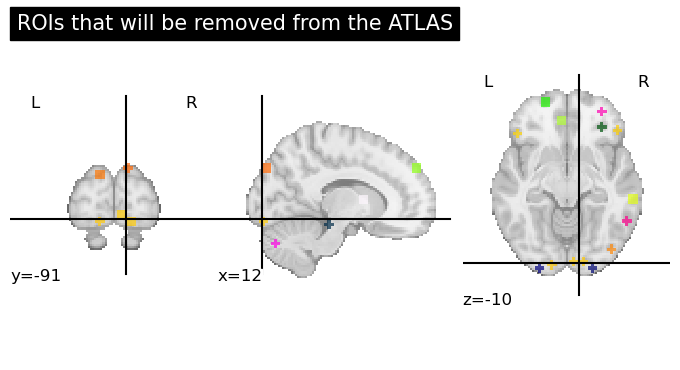

In [26]:
plot_roi(osp.join(ATLAS_DIR,f'{ATLAS_NAME}.RemovedROIs.nii.gz'),title='ROIs that will be removed from the ATLAS')

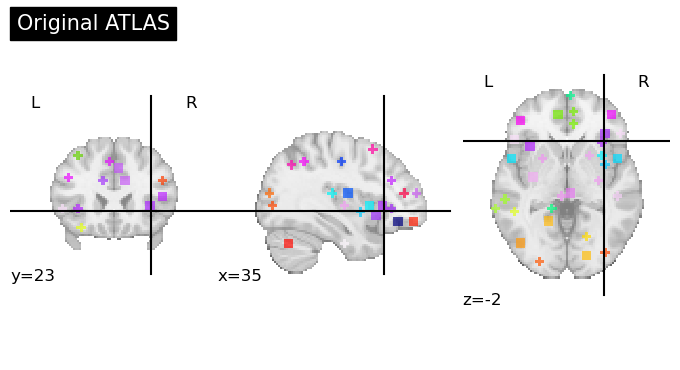

In [27]:
plot_roi(osp.join(ATLAS_DIR,f'{ATLAS_NAME}.nii.gz'),title='Original ATLAS')

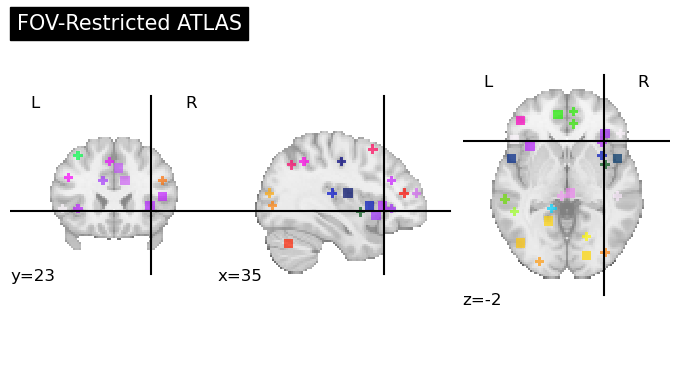

In [28]:
plot_roi(osp.join(ATLAS_DIR,f'rm.{ATLAS_NAME}.fov_restricted.nii.gz'),title='FOV-Restricted ATLAS')

***

In [29]:
command = f"""ml afni; \
             cd {ATLAS_DIR}; \
             3dRank -overwrite -prefix {ATLAS_NAME}.nii.gz -input rm.{ATLAS_NAME}.fov_restricted.nii.gz;"""
output  = subprocess.check_output(command, shell=True, stderr=subprocess.STDOUT)
print(output.strip().decode())

[+] Loading AFNI current-py3  ... 
AFNI/current-py3 last updated  2024-12-11

++ Output dataset /vf/users/SFIMJGC_HCP7T/BCBL2024/atlases/Power264/Power264.nii.gz
